# **Data Normalization Techniques**


- Identify duplicate rows and remove them.

- Check and handle missing values in key columns.

- Identify and normalize compensation-related columns.

- Visualize the effect of normalization techniques on data distributions.


-----


#### Step 1: Install and Import Libraries


In [1]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 184.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 204.9 MB/s eta 0:00:00


In [2]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 163.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 167.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 153.7 MB/s eta 0:00:00


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2: Load the Dataset into a DataFrame


We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.


The functions below will download the dataset into your browser:


In [4]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)

# Display the first few rows to check if data is loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

### Section 1: Handling Duplicates
##### Task 1: Identify and remove duplicate rows.


In [5]:
# Count the number of duplicate rows in the dataset
duplicate_rows = df.duplicated(keep='first').sum()
print(f'Number of duplicate rows: {duplicate_rows}')


Number of duplicate rows: 0


In [6]:
# Display the first few duplicate rows
duplicated_rows = df[df.duplicated()]
print("\nFirst few duplicate rows:")
print(duplicated_rows.head())


First few duplicate rows:
Empty DataFrame
Columns: [ResponseId, MainBranch, Age, Employment, RemoteWork, Check, CodingActivities, EdLevel, LearnCode, LearnCodeOnline, TechDoc, YearsCode, YearsCodePro, DevType, OrgSize, PurchaseInfluence, BuyNewTool, BuildvsBuy, TechEndorse, Country, Currency, CompTotal, LanguageHaveWorkedWith, LanguageWantToWorkWith, LanguageAdmired, DatabaseHaveWorkedWith, DatabaseWantToWorkWith, DatabaseAdmired, PlatformHaveWorkedWith, PlatformWantToWorkWith, PlatformAdmired, WebframeHaveWorkedWith, WebframeWantToWorkWith, WebframeAdmired, EmbeddedHaveWorkedWith, EmbeddedWantToWorkWith, EmbeddedAdmired, MiscTechHaveWorkedWith, MiscTechWantToWorkWith, MiscTechAdmired, ToolsTechHaveWorkedWith, ToolsTechWantToWorkWith, ToolsTechAdmired, NEWCollabToolsHaveWorkedWith, NEWCollabToolsWantToWorkWith, NEWCollabToolsAdmired, OpSysPersonal use, OpSysProfessional use, OfficeStackAsyncHaveWorkedWith, OfficeStackAsyncWantToWorkWith, OfficeStackAsyncAdmired, OfficeStackSyncHaveWor

In [7]:
# Remove duplicate rows from the dataset
df = df.drop_duplicates()

# Verify the removal by counting the number of duplicate rows after removal
num_duplicates_after_removal = df.duplicated().sum()
print(num_duplicates_after_removal)

0


### Section 2: Handling Missing Values
##### Task 2: Identify missing values in `CodingActivities`.


In [8]:
# Identify missing values for all columns
missing_values = df.isnull().sum()
print("Missing values for all columns:")
print(missing_values)


Missing values for all columns:
ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64


In [10]:
#Identify missing values in CodingActivities
missing_values = df['CodingActivities'].isnull().sum()
print("Missing values for the column 'CodingActivities':")
print(missing_values)

Missing values for the column 'CodingActivities':
10971


##### Task 3: Impute missing values in CodingActivities with forward-fill.


In [12]:
#Impute missing values in CodingActivities with forward-fill
df["CodingActivities"] = df["CodingActivities"].fillna(method='ffill')
#fillna(method='ffill') propagates the last valid observation forward to the next valid
#Verify the changes, previously the column had 10971 missing values
print(f"The number of missing rows in 'CodingActivities' after imputation: {df['CodingActivities'].isnull().sum()}")

The number of missing rows in 'CodingActivities' after imputation: 0


/tmp/ipykernel_300/1501262666.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["CodingActivities"] = df["CodingActivities"].fillna(method='ffill')


In [13]:
#Identify missing values in ConvertedCompYearly
missing_values = df['ConvertedCompYearly'].isnull().sum()
print("Missing values for the column 'ConvertedCompYearly':")
print(missing_values)

Missing values for the column 'ConvertedCompYearly':
42002


In [15]:
#Impute missing values in ConvertedCompYearly with forward-fill
df["ConvertedCompYearly"] = df["ConvertedCompYearly"].fillna(df['ConvertedCompYearly'].mean())

#Verify the changes, previously the column had 42002 missing values
print(f"The number of missing rows in 'ConvertedCompYearly' after imputation: {df['ConvertedCompYearly'].isnull().sum()}")

The number of missing rows in 'ConvertedCompYearly' after imputation: 0


**Note**:  Before normalizing ConvertedCompYearly, ensure that any missing values (NaN) in this column are handled appropriately. You can choose to either drop the rows containing NaN or replace the missing values with a suitable statistic (e.g., median or mean).


### Section 3: Normalizing Compensation Data
##### Task 4: Identify compensation-related columns, such as ConvertedCompYearly.
Normalization is commonly applied to compensation data to bring values within a comparable range. Here, you’ll identify ConvertedCompYearly or similar columns, which contain compensation information. This column will be used in the subsequent tasks for normalization.


In [16]:
# Define the keywords for compensation-related columns
keywords = ["Comp", "Salary", "Income"]

# Find columns that contain any of the specified keywords
compensation_columns = [col for col in df.columns if any(word in col for word in keywords)]

# Print the found compensation-related columns
print(compensation_columns)

['CompTotal', 'AIComplex', 'ConvertedCompYearly']


##### Task 5: Normalize ConvertedCompYearly using Min-Max Scaling.
Min-Max Scaling brings all values in a column to a 0-1 range, making it useful for comparing data across different scales. Here, you will apply Min-Max normalization to the ConvertedCompYearly column, creating a new column ConvertedCompYearly_MinMax with normalized values.


In [19]:
# Min-Max Scaling of ConvertedCompYearly
df['ConvertedCompYearly_MinMax'] = (
    df['ConvertedCompYearly'] - df['ConvertedCompYearly'].min()
) / (
    df['ConvertedCompYearly'].max() - df['ConvertedCompYearly'].min()
)

df['ConvertedCompYearly_MinMax']

0        0.0053
1        0.0053
2        0.0053
3        0.0053
4        0.0053
          ...  
65432    0.0053
65433    0.0053
65434    0.0053
65435    0.0053
65436    0.0053
Name: ConvertedCompYearly_MinMax, Length: 65437, dtype: float64

##### Task 6: Apply Z-score Normalization to `ConvertedCompYearly`.

Z-score normalization standardizes values by converting them to a distribution with a mean of 0 and a standard deviation of 1. This method is helpful for datasets with a Gaussian (normal) distribution. Here, you’ll calculate Z-scores for the ConvertedCompYearly column, saving the results in a new column ConvertedCompYearly_Zscore.


In [20]:
df['ConvertedCompYearly_Zscore'] = (
    df['ConvertedCompYearly'] - df['ConvertedCompYearly'].mean()
) / df['ConvertedCompYearly'].std()

df['ConvertedCompYearly_Zscore']

0        1.302052e-16
1        1.302052e-16
2        1.302052e-16
3        1.302052e-16
4        1.302052e-16
             ...     
65432    1.302052e-16
65433    1.302052e-16
65434    1.302052e-16
65435    1.302052e-16
65436    1.302052e-16
Name: ConvertedCompYearly_Zscore, Length: 65437, dtype: float64

### Section 4: Visualization of Normalized Data
##### Task 7: Visualize the distribution of `ConvertedCompYearly`, `ConvertedCompYearly_Normalized`, and `ConvertedCompYearly_Zscore`

Visualization helps you understand how normalization changes the data distribution. In this task, create histograms for the original ConvertedCompYearly, as well as its normalized versions (ConvertedCompYearly_MinMax and ConvertedCompYearly_Zscore). This will help you compare how each normalization technique affects the data range and distribution.


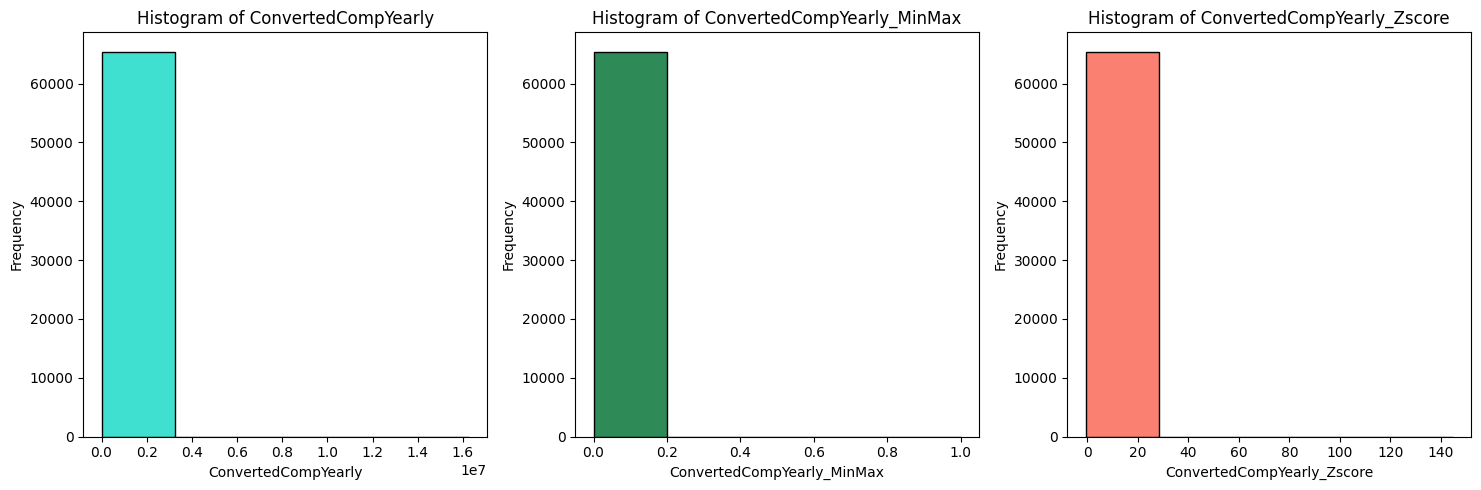

In [27]:
## Write your code here
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
plt.hist(df['ConvertedCompYearly'], bins=5, color='turquoise', edgecolor='black')
plt.title('Histogram of ConvertedCompYearly')
plt.xlabel('ConvertedCompYearly')
plt.ylabel('Frequency')

# Plot histogram for 'ConvertedCompYearly_MinMax'
plt.subplot(1, 3, 2)
plt.hist(df['ConvertedCompYearly_MinMax'], bins=5, color='seagreen', edgecolor='black')
plt.title('Histogram of ConvertedCompYearly_MinMax')
plt.xlabel('ConvertedCompYearly_MinMax')
plt.ylabel('Frequency')

# Plot histogram for 'ConvertedCompYearly_Zscore'
plt.subplot(1, 3, 3)
plt.hist(df['ConvertedCompYearly_Zscore'], bins=5, color='salmon', edgecolor='black')
plt.title('Histogram of ConvertedCompYearly_Zscore')
plt.xlabel('ConvertedCompYearly_Zscore')
plt.ylabel('Frequency')

# Display the histograms
plt.tight_layout()
plt.show()
